In [2]:
import numpy as np
#import matplotlib#.pyplot as plt
#import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

In [3]:
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])  # change sample index

In [6]:
# takes a sequence of words, maps it to one hot to each word in the 10,000 length vector
# will loose the ordering of words and will loose the count of individual words
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)   

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [59]:
# setup train set into train and val
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [60]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5298 - accuracy: 0.7835 - val_loss: 0.4033 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3237 - accuracy: 0.8965 - val_loss: 0.3126 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2327 - accuracy: 0.9249 - val_loss: 0.2859 - val_accuracy: 0.8882
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1840 - accuracy: 0.9391 - val_loss: 0.2742 - val_accuracy: 0.8908
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1497 - accuracy: 0.9529 - val_loss: 0.2783 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1227 - accuracy: 0.9617 - val_loss: 0.3411 - val_accuracy: 0.8749
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1027 - accuracy: 0.9712 - val_loss: 0.3048 - val_accuracy: 0.8847
Epoch 8/20
30

In [50]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

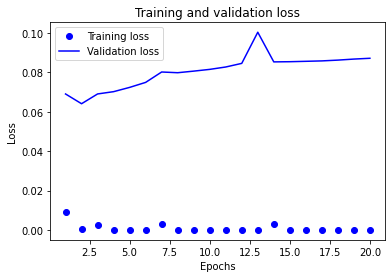

In [51]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

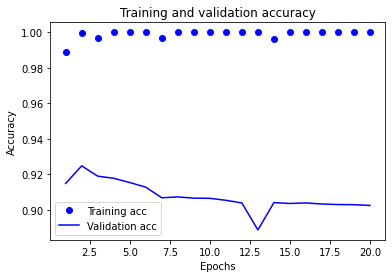

In [52]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [54]:
#model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer='rmsprop',
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results6 = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 [==============================] - 1s 11ms/step - loss: 0.0236 - accuracy: 0.9742
Epoch 2/2
782/782 [==============================] - 1s 851us/step - loss: 0.1366 - accuracy: 0.8509


In [16]:
results1 = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 995us/step - loss: 0.2968 - accuracy: 0.8825


In [56]:
results1

[0.29678815603256226, 0.8825200200080872]

In [24]:
results2

[0.2988342046737671, 0.881879985332489]

In [32]:
results3

[0.45211729407310486, 0.862280011177063]

In [40]:
results4

[0.5109753608703613, 0.8604000210762024]

In [48]:
results5

[0.4889068305492401, 0.8555999994277954]

In [55]:
results6

[0.13655073940753937, 0.8509200215339661]

In [ ]:
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:

You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
Try using the mse loss function instead of binary_crossentropy.
Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.